In [55]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid", palette="pastel")    

In [4]:
df = pd.read_csv("../data/sales-data-sales.csv", index_col=0)

In [5]:
df

,date,clientId,clientName,clientType,productId,productName,productCategory,productPrice,saleType,saleAmount,saleDiscount
0,2024-01-01,469,John Doe,Non-profit,512,Widget Deluxe,Gadgets,18485.965609,Online sales,17885.122587,10%
1,2024-01-01,251,John Doe,Businesses,550,Widget Deluxe,Gadgets,11246.556060,Direct sales,19125.755121,10%
2,2024-01-01,857,John Doe,Individuals,495,Widget Deluxe,Gadgets,13108.124367,Direct sales,19978.358970,10%
3,2024-01-01,791,John Doe,Mixed,544,Widget Deluxe,Gadgets,16309.442173,Online sales,10930.839375,10%
4,2024-01-01,390,John Doe,Businesses,578,Widget Deluxe,Gadgets,18465.857969,Partner sales,17840.364412,10%
...,...,...,...,...,...,...,...,...,...,...,...
995,2024-01-01,958,John Doe,Individuals,492,Widget Deluxe,Gadgets,15970.949467,Partner sales,14208.493203,10%
996,2024-01-01,145,John Doe,Individuals,517,Widget Deluxe,Gadgets,14420.081923,Online sales,16672.818320,10%
997,2024-01-01,688,John Doe,Non-profit,526,Widget Deluxe,Gadgets,17568.847121,Online sales,12198.841454,10%
998,2024-01-01,728,John Doe,Individuals,558,Widget Deluxe,Gadgets,12404.204389,Online sales,23201.523928,10%


In [6]:
df.describe(include="all")

,date,clientId,clientName,clientType,productId,productName,productCategory,productPrice,saleType,saleAmount,saleDiscount
count,1000,1000.0000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000
unique,1,NaN,1,4,NaN,1,1,NaN,5,NaN,1
top,2024-01-01,NaN,John Doe,Individuals,NaN,Widget Deluxe,Gadgets,NaN,Online sales,NaN,10%
freq,1000,NaN,1000,450,NaN,1000,1000,NaN,430,NaN,1000
mean,NaN,498.6500,NaN,NaN,495.722000,NaN,NaN,14032.031678,NaN,13482.820296,NaN
std,NaN,287.0747,NaN,NaN,50.485062,NaN,NaN,4055.612146,NaN,5025.350773,NaN
min,NaN,0.0000,NaN,NaN,328.000000,NaN,NaN,562.899102,NaN,-3045.317643,NaN
25%,NaN,256.2500,NaN,NaN,462.750000,NaN,NaN,11285.683885,NaN,10036.042941,NaN
50%,NaN,489.0000,NaN,NaN,496.500000,NaN,NaN,14068.190929,NaN,13378.415220,NaN
75%,NaN,750.0000,NaN,NaN,528.000000,NaN,NaN,16538.843711,NaN,16917.389279,NaN


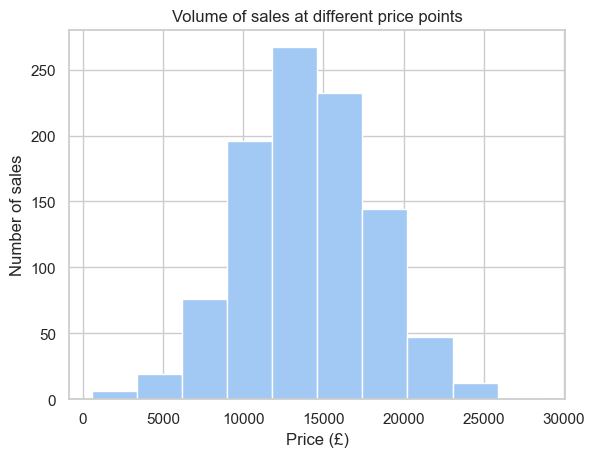

In [7]:
fig, ax = plt.subplots()

ax.hist(df["productPrice"], bins=10)

ax.set_title("Volume of sales at different price points")
ax.set_xlabel("Price (£)")
ax.set_ylabel("Number of sales")

plt.show()

In [8]:
clientTypes = pd.unique(df["clientType"])
salesTypes = pd.unique(df["saleType"])

In [13]:
clientTypes

array(['Non-profit', 'Businesses', 'Individuals', 'Mixed'], dtype=object)

In [17]:
df[["clientType", "saleAmount"]]

,clientType,saleAmount
0,Non-profit,17885.122587
1,Businesses,19125.755121
2,Individuals,19978.358970
3,Mixed,10930.839375
4,Businesses,17840.364412
...,...,...
995,Individuals,14208.493203
996,Individuals,16672.818320
997,Non-profit,12198.841454
998,Individuals,23201.523928


In [50]:
df_sales = df[["clientType", "saleAmount"]].groupby("clientType").sum()

df["saleAmountF"] = df["saleAmount"].round(2)
df_sales["saleAmountF"] = df_sales["saleAmount"].round(2)

df_sales

,saleAmount,saleAmountF
clientType,,
Businesses,3.050129e+06,3050129.38
Individuals,5.975328e+06,5975327.98
Mixed,3.653600e+06,3653600.00
Non-profit,8.037629e+05,803762.94


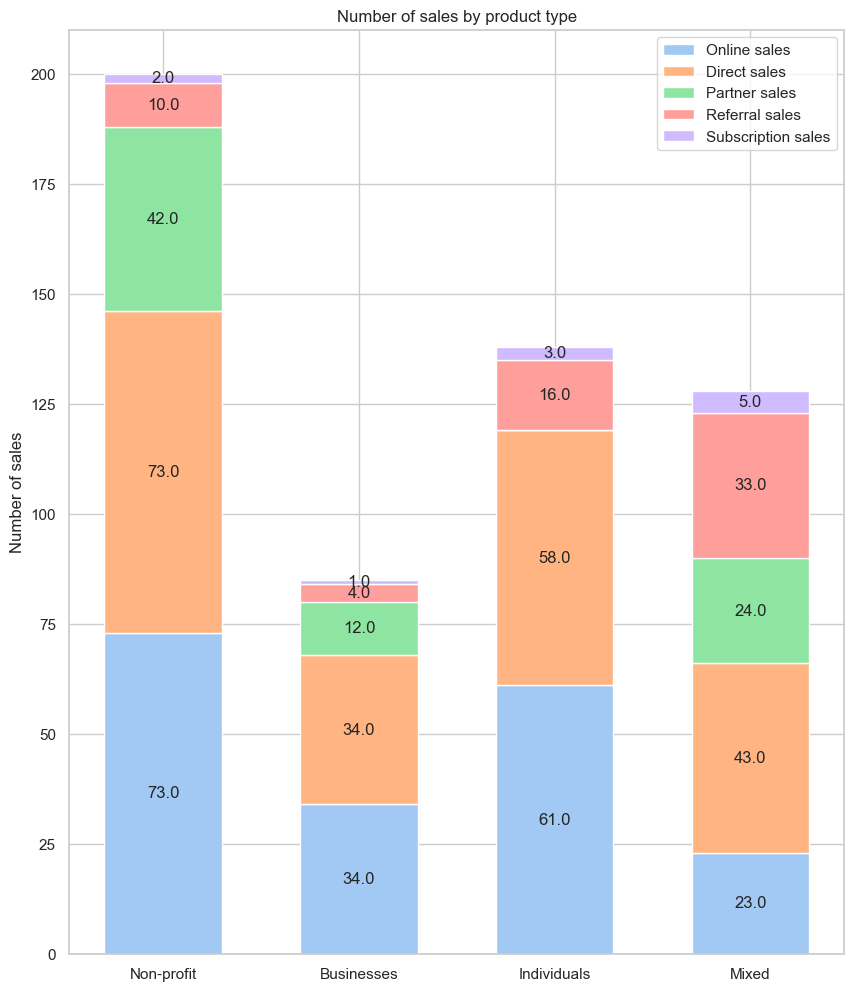

In [9]:
client_group = clientTypes

sales_counts = {
    'Online sales': np.array([73, 34, 61, 23]),
    'Direct sales': np.array([73, 34, 58, 43]),
    'Partner sales': np.array([42, 12, 0, 24]),
    'Referral sales': np.array([10, 4, 16, 33]),
    'Subscription sales': np.array([2, 1, 3, 5]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(10,12))

bottom = np.zeros(len(client_group))

for sales_type, sales_count in sales_counts.items():
    p = ax.bar(client_group, sales_count, width, label=sales_type, bottom=bottom)
    bottom += sales_count

    threshold = 0

    labels = [v if v > threshold else "" for v in p.datavalues]    

    ax.bar_label(p, labels=labels, label_type="center")

ax.set_title('Number of sales by product type')
ax.set_ylabel('Number of sales')

ax.legend()

plt.show()

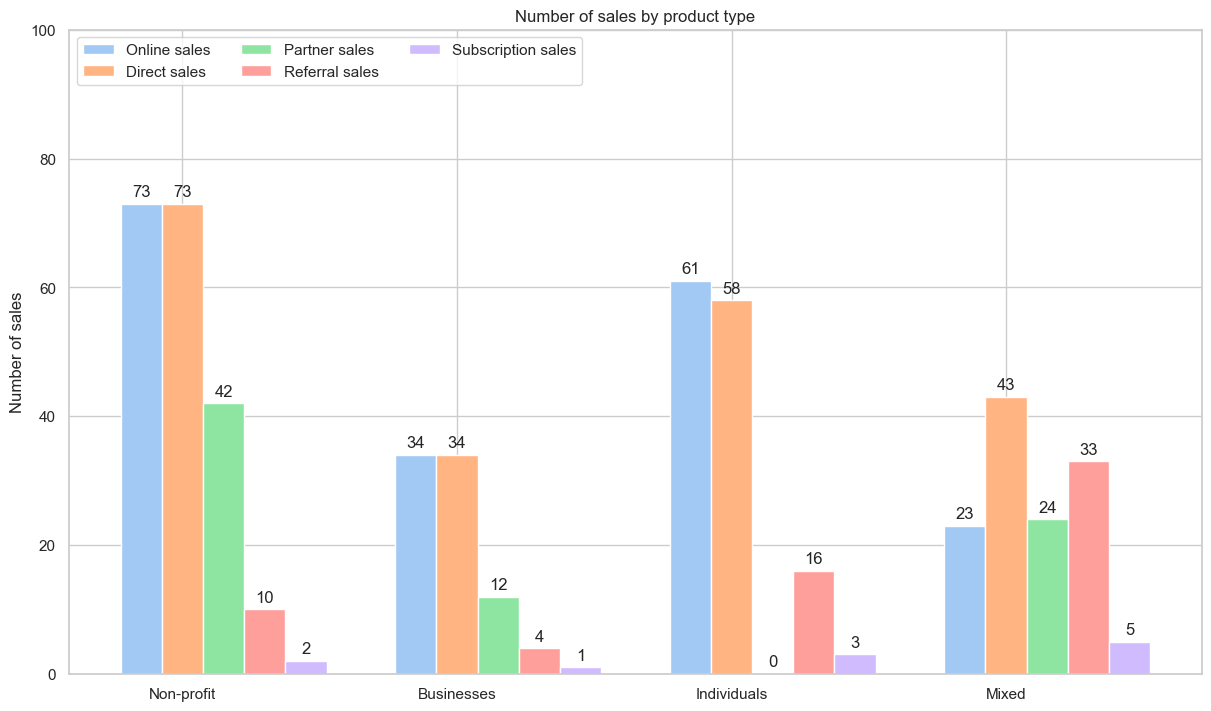

In [10]:
client_groups = clientTypes
sales_counts = {
    'Online sales': np.array([73, 34, 61, 23]),
    'Direct sales': np.array([73, 34, 58, 43]),
    'Partner sales': np.array([42, 12, 0, 24]),
    'Referral sales': np.array([10, 4, 16, 33]),
    'Subscription sales': np.array([2, 1, 3, 5]),
}

x = np.arange(len(client_groups))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 7))

for attribute, measurement in sales_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of sales')
ax.set_title('Number of sales by product type')
ax.set_xticks(x + width, client_groups)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()

In [37]:
salesTypes.sort()
salesTypes  

array(['Direct sales', 'Online sales', 'Partner sales', 'Referral sales',
       'Subscription sales'], dtype=object)

In [51]:
df_bySaleType = df[["saleType", "saleAmountF"]].groupby("saleType").sum()
df_bySaleType

,saleAmountF
saleType,
Direct sales,2909364.26
Online sales,5726949.62
Partner sales,2321787.08
Referral sales,1179384.46
Subscription sales,1345334.90


In [46]:
df_bySaleType.to_numpy().reshape(5)

array([2909364.22526391, 5726949.64032379, 2321787.09562447,
       1179384.48534898, 1345334.84937891])

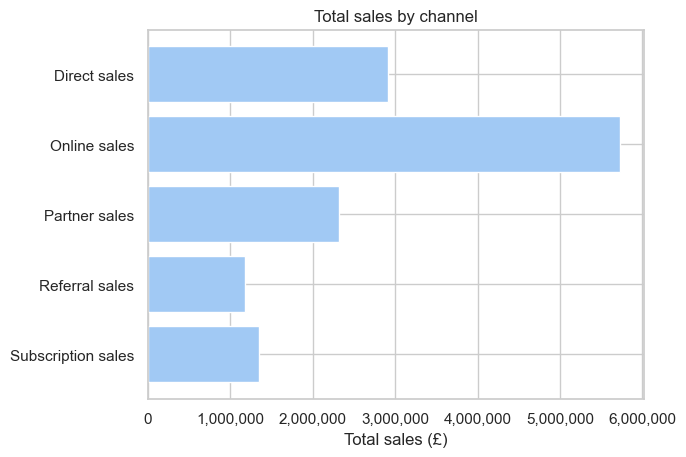

In [56]:
# Fixing random state for reproducibility

fig, ax = plt.subplots()

# Example data
sales_channels = salesTypes

y_pos = np.arange(len(sales_channels))
total_sales = df_bySaleType.to_numpy().reshape(5)

ax.barh(y_pos, total_sales, align='center')
ax.set_yticks(y_pos, labels=sales_channels)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('Total sales (£)')
ax.set_title('Total sales by channel')
ax.get_xaxis().set_major_formatter(
    tck.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [53]:
total_sales

array([2909364.26, 5726949.62, 2321787.08, 1179384.46, 1345334.9 ])

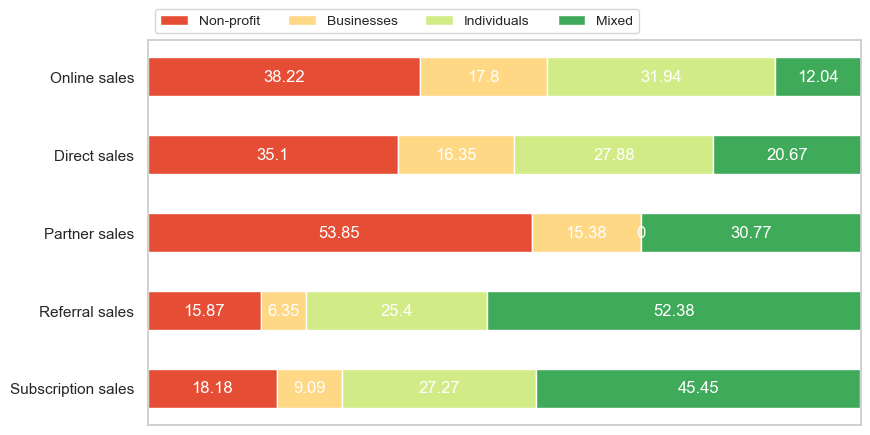

In [12]:

category_names = clientTypes

results = {
    'Online sales': [np.round(x * 100 / np.sum([73, 34, 61, 23]), 2) for x in np.array([73, 34, 61, 23])],
    'Direct sales': [np.round(x * 100 / np.sum([73, 34, 58, 43]), 2) for x in np.array([73, 34, 58, 43])],
    'Partner sales': [np.round(x * 100 / np.sum([42, 12, 0, 24]), 2) for x in np.array([42, 12, 0, 24])],
    'Referral sales': [np.round(x * 100 / np.sum([10, 4, 16, 33]), 2) for x in np.array([10, 4, 16, 33])],
    'Subscription sales': [np.round(x * 100 / np.sum([2, 1, 3, 5]), 2) for x in np.array([2, 1, 3, 5])],
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'

        ax.bar_label(rects, label_type='center', color=text_color)
        ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()